In [1]:
import os
import sys
sys.path.append('/usr/src/code/src')
os.chdir('/usr/src/code/')

import torch

from src.models.UNet import UNet, UNet2DWrapper
from src.utils.other_utils import *
from src.pdlmc.constraints import classifier_constraint, brightness_constraint
from src.utils.samplers import *
from src.utils.trainers import *
from src.utils.schedulers import *


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
%matplotlib inline

/usr/local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
IMG_SIZE = 28
IMG_CH = 1
BATCH_SIZE = 128
N_CLASSES = 10

model = torch.load("model.pkl", weights_only=False)
classifier = torch.load("mnist_classifier.pkl", weights_only=False)

	 Sampling images: 100%|██████████| 1/1 [00:01<00:00,  1.68s/it]


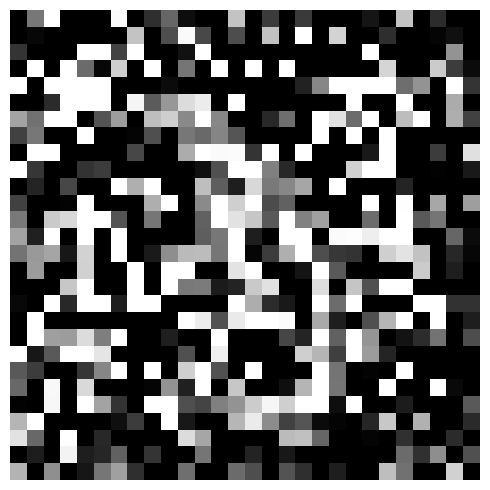

In [6]:
timesteps = 500
eps = 1e-5

vesde_sampler = VESDESampler(device=device, img_ch=IMG_CH, img_size=IMG_SIZE)
sample_timesteps = torch.linspace(eps, 1.0, timesteps, device=device)
img = sample_images(
    model=model,
    img_ch=IMG_CH,
    img_size=IMG_SIZE,
    reverse=vesde_sampler.reverse,
    timesteps=sample_timesteps,
    device=device,
    sample_size=1,
    plot=True,
    save=False,
)

# Generate 100 images
# imgs_vpsde = [vpsde_sampler.sample_images(model=model) for _ in range(100)]
# print(f"Generated {len(imgs_vpsde)} images using VPSDESampler.")
# calculate_class_proportions(imgs_vpsde, classifier, n_classes=N_CLASSES, device=device)

# gfuncs = [partial(classifier_constraint, classifier=classifier, target_class=9, epsilon=0.01)]
# lmc_steps: int = 1
# step_size: float = 1.8
# step_size_lambda: float = 0.4

# pdlmc_sampler = PDLMCSampler(
#     scheduler=scheduler,
#     device=device,
#     img_ch=IMG_CH,
#     img_size=IMG_SIZE,
#     ncols=ncols,
#     gfuncs=gfuncs,
#     lmc_steps=lmc_steps,
#     step_size=step_size,
#     step_size_lambda=step_size_lambda,
# )

# imgs_pdlmc = [pdlmc_sampler.sample_images(model=model) for _ in range(100)]
# print(f"Generated {len(imgs_pdlmc)} images using PDLMCSampler.")
# calculate_class_proportions(imgs_pdlmc, classifier, n_classes=N_CLASSES, device=device)
# img = torch.clamp(img, 0, 1)
# img = img.view(img.size(0), -1)
# mean_brightness = img.mean()

# print(f"Mean brightness of the generated image: {mean_brightness.item():.4f}")

	 Sampling images: 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]


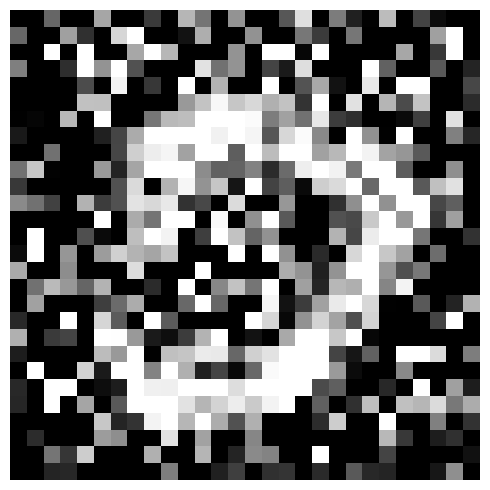

In [7]:
gfuncs = [
    partial(classifier_constraint, classifier=classifier, target_class=9, epsilon=0.01)
]
lmc_steps: int = 1
step_size: float = 1.8
step_size_lambda: float = 0.4

pdlmc_sampler = PDLMCVESampler(
    device=device,
    img_ch=IMG_CH,
    img_size=IMG_SIZE,
    gfuncs=gfuncs,
    lmc_steps=lmc_steps,
    step_size=step_size,
    step_size_lambda=step_size_lambda,
)

sample_timesteps = torch.linspace(eps, 1.0, timesteps, device=device)
img = sample_images(
    model=model,
    img_ch=IMG_CH,
    img_size=IMG_SIZE,
    reverse=pdlmc_sampler.reverse,
    timesteps=sample_timesteps,
    device=device,
    sample_size=1,
    plot=True,
    save=False,
)
# img = torch.clamp(img, 0, 1)
# img = img.view(img.size(0), -1)
# mean_brightness = img.mean()

# print(f"Mean brightness of the generated image: {mean_brightness.item():.4f}")